In [5]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [6]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 23_03_2022 07_34_00.xlsx'

In [7]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [8]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 16_03_2022 07_33_42.xlsx')

In [9]:
filtrado = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade']]
filtrado = filtrado.dropna()
filtrado

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,0-9 anos,6.0
1,2020_01,Sim,SRAG não especificado,0-9 anos,4.0
2,2020_01,Sim,SRAG não especificado,0-9 anos,7.0
3,2020_02,Sim,SRAG não especificado,0-9 anos,0.0
4,2020_02,Sim,SRAG não especificado,0-9 anos,0.0
...,...,...,...,...,...
168336,2021_06,Sim,COVID-19,40-49 anos,47.0
168337,2021_10,Sim,COVID-19,60-69 anos,65.0
168338,2021_10,Sim,COVID-19,60-69 anos,67.0
168339,2021_11,Sim,COVID-19,60-69 anos,60.0


In [10]:
filtrado['Idade'] = filtrado['Idade'].astype(int)
filtrado.head(20)

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,0-9 anos,6
1,2020_01,Sim,SRAG não especificado,0-9 anos,4
2,2020_01,Sim,SRAG não especificado,0-9 anos,7
3,2020_02,Sim,SRAG não especificado,0-9 anos,0
4,2020_02,Sim,SRAG não especificado,0-9 anos,0
5,2020_03,Sim,SRAG não especificado,0-9 anos,2
6,2020_03,Sim,SRAG não especificado,0-9 anos,5
7,2020_03,Sim,SRAG não especificado,30-39 anos,31
8,2020_03,Sim,SRAG não especificado,30-39 anos,36
9,2020_03,Sim,SRAG não especificado,50-59 anos,51


In [11]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

In [12]:
filtrado = filtrado.loc[filtrado['Houve internacao']=='Sim']
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado.head()

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
11,2020_03,Sim,COVID-19,40-49 anos,40-59 anos
17,2020_03,Sim,COVID-19,40-49 anos,40-59 anos
18,2020_03,Sim,COVID-19,40-49 anos,40-59 anos
19,2020_04,Sim,COVID-19,30-39 anos,20-39 anos
23,2020_04,Sim,COVID-19,20-29 anos,20-39 anos


In [13]:
totalHospitalizacoes = filtrado.groupby('Competencia Internacao').count()
totalHospitalizacoes = totalHospitalizacoes.drop('2020_03')
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade
Competencia Internacao,,,,
2020_04,595,595,595,595
2020_05,1101,1101,1101,1101
2020_06,2438,2438,2438,2438
2020_07,4884,4884,4884,4884
2020_08,5224,5224,5224,5224


In [32]:
separaIdade = filtrado.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head()

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_03                                4                    4   
          2020_04                                7                    7   
          2020_05                                7                    7   
          2020_06                               19                   19   
          2020_07                               42                   42   

                                  Faixa Etaria  
Idade     Competencia Internacao                
0-11 anos 2020_03                            4  
          2020_04                            7  
          2020_05                            7  
          2020_06                           19  
          2020_07                           42

In [37]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
#idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade11 = idade11.drop(['2020_03'])
#idade11 = idade11['Proporcao']
#idade11.tail()
idade11

,Idade,Houve internacao,Classificacao final,Faixa Etaria
Competencia Internacao,,,,
2020_03,0-11 anos,4,4,4
2020_04,0-11 anos,7,7,7
2020_05,0-11 anos,7,7,7
2020_06,0-11 anos,19,19,19
2020_07,0-11 anos,42,42,42
2020_08,0-11 anos,63,63,63
2020_09,0-11 anos,20,20,20
2020_10,0-11 anos,26,26,26
2020_11,0-11 anos,36,36,36


In [38]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
#idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade19 = idade19.drop('2020_03')
#idade19 = idade19['Proporcao']
idade19.tail()

,Idade,Houve internacao,Classificacao final,Faixa Etaria
Competencia Internacao,,,,
2021_11,12-19 anos,5,5,5
2021_12,12-19 anos,7,7,7
2022_01,12-19 anos,42,42,42
2022_02,12-19 anos,30,30,30
2022_03,12-19 anos,7,7,7


In [39]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
#idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade39 = idade39.drop(['2020_03'])
#idade39 = idade39['Proporcao']
idade39.tail()

,Idade,Houve internacao,Classificacao final,Faixa Etaria
Competencia Internacao,,,,
2021_11,20-39 anos,135,135,135
2021_12,20-39 anos,81,81,81
2022_01,20-39 anos,358,358,358
2022_02,20-39 anos,240,240,240
2022_03,20-39 anos,38,38,38


In [40]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
#idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade59 = idade59.drop(['2020_03'])
#idade59 = idade59['Proporcao']
idade59.tail()

,Idade,Houve internacao,Classificacao final,Faixa Etaria
Competencia Internacao,,,,
2021_11,40-59 anos,330,330,330
2021_12,40-59 anos,177,177,177
2022_01,40-59 anos,757,757,757
2022_02,40-59 anos,532,532,532
2022_03,40-59 anos,67,67,67


In [41]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
#dade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade79 = idade79.drop(['2020_03'])
#idade79 = idade79['Proporcao']
idade79.tail()

,Idade,Houve internacao,Classificacao final,Faixa Etaria
Competencia Internacao,,,,
2021_11,60-79 anos,729,729,729
2021_12,60-79 anos,266,266,266
2022_01,60-79 anos,1448,1448,1448
2022_02,60-79 anos,1324,1324,1324
2022_03,60-79 anos,226,226,226


In [42]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
#idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
#idade80 = idade80.drop(['2020_03'])
#idade80 = idade80['Proporcao']
idade80.tail()

,Idade,Houve internacao,Classificacao final,Faixa Etaria
Competencia Internacao,,,,
2021_11,80 e mais,206,206,206
2021_12,80 e mais,91,91,91
2022_01,80 e mais,924,924,924
2022_02,80 e mais,976,976,976
2022_03,80 e mais,192,192,192


In [21]:
competencia = idade80.to_frame()
competencia = competencia.reset_index()
competencia = competencia['Competencia Internacao']
competencia

0     2020_04
1     2020_05
2     2020_06
3     2020_07
4     2020_08
5     2020_09
6     2020_10
7     2020_11
8     2020_12
9     2021_01
10    2021_02
11    2021_03
12    2021_04
13    2021_05
14    2021_06
15    2021_07
16    2021_08
17    2021_09
18    2021_10
19    2021_11
20    2021_12
21    2022_01
22    2022_02
23    2022_03
Name: Competencia Internacao, dtype: object

In [22]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [23]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 23_3_2022'

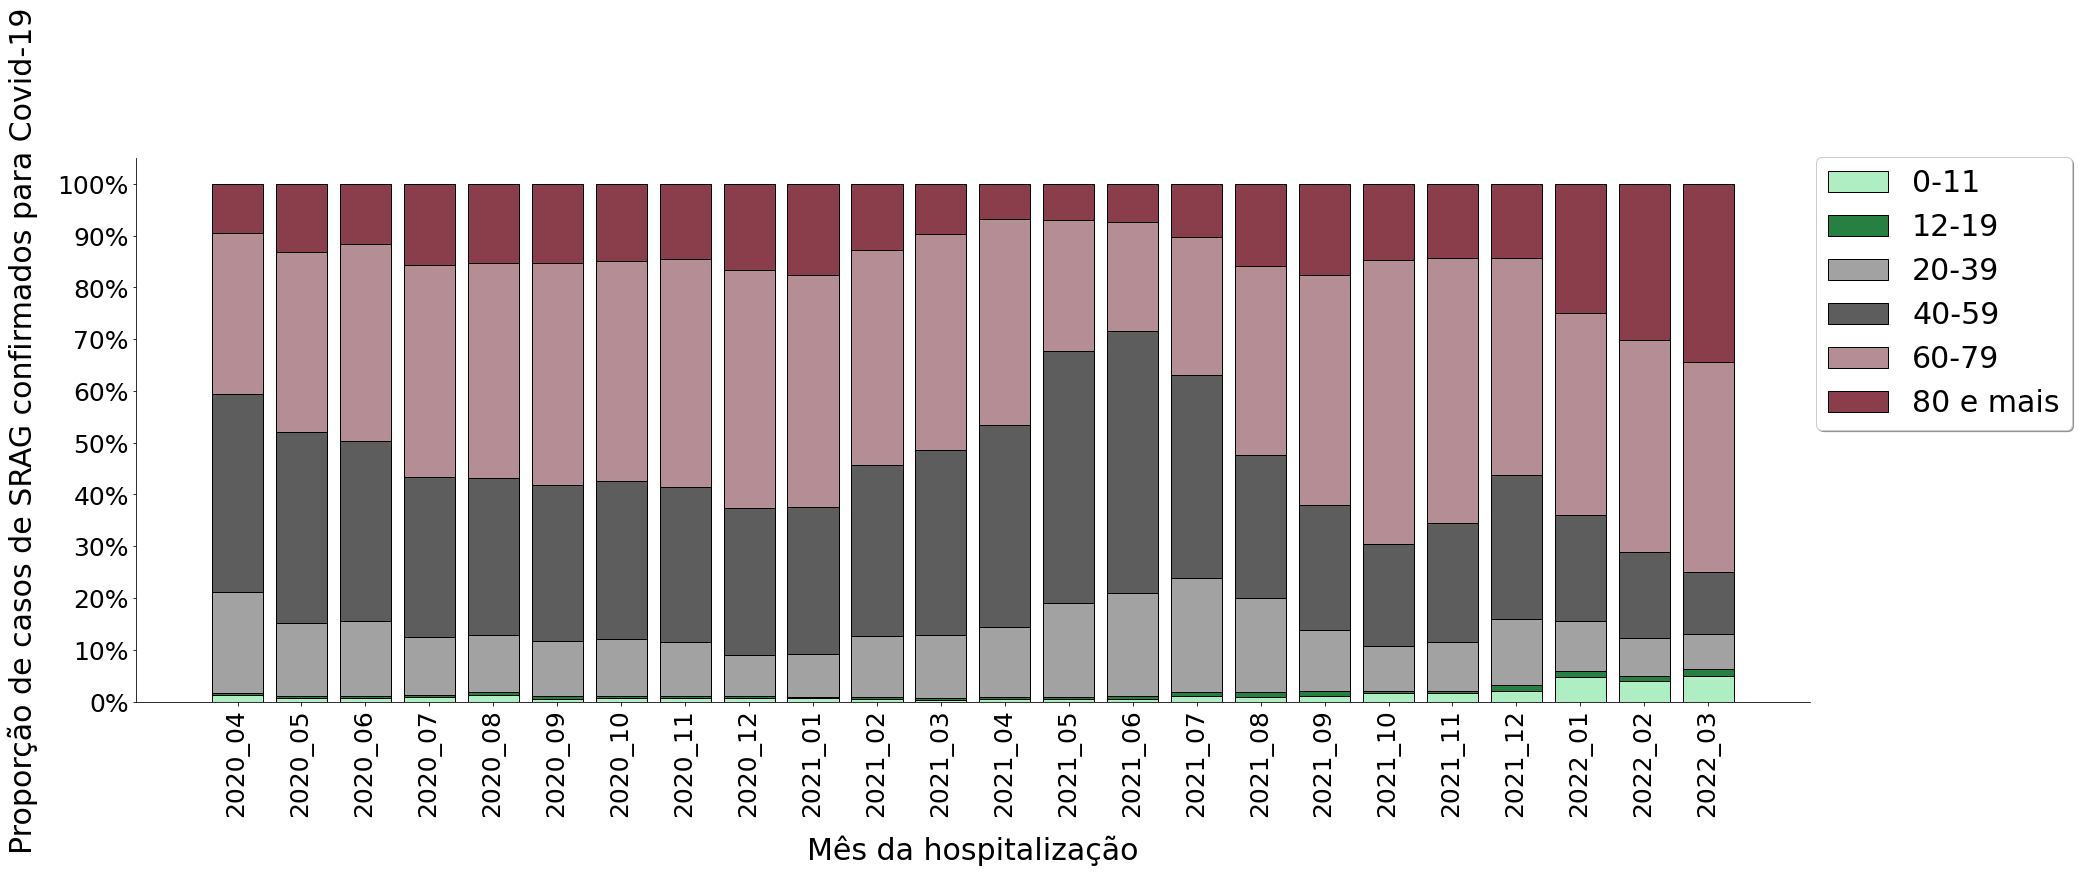

In [24]:
plt.figure(figsize=(30,10))
plt.bar(competencia,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(competencia,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(competencia,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(competencia,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(competencia,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(competencia,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide10.jpeg',dpi=720,bbox_inches='tight')

In [25]:
totalHospitalizacoes

,Houve internacao,Classificacao final,Faixa Etaria,Idade
Competencia Internacao,,,,
2020_04,595,595,595,595
2020_05,1101,1101,1101,1101
2020_06,2438,2438,2438,2438
2020_07,4884,4884,4884,4884
2020_08,5224,5224,5224,5224
2020_09,3801,3801,3801,3801
2020_10,3477,3477,3477,3477
2020_11,5220,5220,5220,5220
2020_12,6466,6466,6466,6466


In [26]:
teste_obitos_total = totalHospitalizacoes['Classificacao final'].sum()
teste_obitos_total

120650